# Real Data Time Series Forecasting: Model 1 (Grid)

## Import Libraries

In [ ]:
import importlib
import utils_model1

importlib.reload(utils_model1)
from utils_model1 import *

In [ ]:
device = cuda_check(verbose=1)

In [ ]:
metadata = pd.read_csv('DeDe_48stations/DeDe_48sites_metadata.csv')

metadata.head(5)

## Import Dataset

In [4]:
df = pd.read_csv('DeDe_48stations_allfeatures/GHI_CI_NCEP_Iclr_15min_DeDe2023_newiclr.csv', index_col='Datetime', parse_dates=True)

df.loc['2023-01-01 07:15:00':]

Site_id        rawI           I  CI_CM  \
Datetime                                                      
2023-01-01 07:15:00        1   73.329167   73.329167   17.0   
2023-01-01 07:15:00        3   46.861833   46.861833   25.0   
2023-01-01 07:15:00        4  110.733833  110.733833  173.0   
2023-01-01 07:15:00        5  119.808667  119.808667   22.0   
2023-01-01 07:15:00        6   98.019167   98.019167   46.0   
...                      ...         ...         ...    ...   
2023-12-31 23:45:00       44   -2.196333    0.000000    NaN   
2023-12-31 23:45:00       45   -2.238667    0.000000    NaN   
2023-12-31 23:45:00       46   -2.570167    0.000000    NaN   
2023-12-31 23:45:00       47   -2.601500    0.000000    NaN   
2023-12-31 23:45:00       48   -3.169667    0.000000    NaN   

                     CI_CM_interpolated  CI_RGB  CI_RGB_interpolated  \
Datetime                                                               
2023-01-01 07:15:00                17.0   123.0                123.0   
2023-01-01 07:15:00                25.0   103.0                103.0   
2023-01-01 07:15:00               173.0   128.0                128.0   
2023-01-01 07:15:00                22.0    94.0                 94.0   
2023-01-01 07:15:00                46.0   107.0                107.0   
...                                 ...     ...                  ...   
2023-12-31 23:45:00                 NaN     NaN                  NaN   
2023-12-31 23:45:00                 NaN     NaN                  NaN   
2023-12-31 23:45:00                 NaN     NaN                  NaN   
2023-12-31 23:45:00                 NaN     NaN                  NaN   
2023-12-31 23:45:00                 NaN     NaN                  NaN   

                     Temperature  Relative Humidity  Pressure  Wind speed  \
Datetime                                                                    
2023-01-01 07:15:00       294.21              60.44   1015.55        1.32   
2023-01-01 07:15:00       287.75              75.27    996.59        2.82   
2023-01-01 07:15:00       288.47              73.80   1000.32        3.40   
2023-01-01 07:15:00       289.50              84.78   1002.52        4.46   
2023-01-01 07:15:00       285.45              84.38    999.74        1.49   
...                          ...                ...       ...         ...   
2023-12-31 23:45:00       301.65              63.49   1008.03        0.29   
2023-12-31 23:45:00       296.91              64.69   1002.19        1.96   
2023-12-31 23:45:00       291.68              65.54    964.87        0.76   
2023-12-31 23:45:00       298.18              56.06   1008.13        0.81   
2023-12-31 23:45:00       295.60              60.57    988.30        1.09   

                     Wind direction  Rainfall  Snowfall  Snow depth  \
Datetime                                                              
2023-01-01 07:15:00          346.08       0.0       0.0         0.0   
2023-01-01 07:15:00           10.56       0.0       0.0         0.0   
2023-01-01 07:15:00           41.70       0.0       0.0         0.0   
2023-01-01 07:15:00           23.11       0.0       0.0         0.0   
2023-01-01 07:15:00           49.24       0.0       0.0         0.0   
...                             ...       ...       ...         ...   
2023-12-31 23:45:00          315.06       0.0       0.0         0.0   
2023-12-31 23:45:00          283.26       0.0       0.0         0.0   
2023-12-31 23:45:00          299.31       0.0       0.0         0.0   
2023-12-31 23:45:00          349.59       0.0       0.0         0.0   
2023-12-31 23:45:00          104.88       0.0       0.0         0.0   

                     Short-wave irradiation        Iclr  
Datetime                                                 
2023-01-01 07:15:00                 49.2072   29.613384  
2023-01-01 07:15:00                 56.7988   61.500012  
2023-01-01 07:15:00                 56.1896   75.775343  
2023-01-01 07:15:00                 79.7920  107

In [11]:
# Load the dataset
df = pd.read_csv('DeDe_48stations_allfeatures/GHI_CI_NCEP_Iclr_15min_DeDe2023_newiclr.csv', index_col='Datetime', parse_dates=True)

# Drop columns
df = df.drop(columns=['CI_CM', 'CI_RGB', 'Wind direction', 'Snowfall', 'Snow depth', 'CI_CM_interpolated', 'CI_RGB_interpolated', 'rawI'])
df = df.rename(columns={
    'Relative Humidity': 'RelativeHumidity', 
    'Wind speed': 'WindSpeed',
    'Short-wave irradiation': 'Inwp',
    })

df.loc['2023-01-02 07:00:00':'2023-01-03 07:00:00']

Site_id          I  Temperature  RelativeHumidity  \
Datetime                                                                 
2023-01-02 07:00:00        1  26.276167       293.81             58.75   
2023-01-02 07:00:00        3  19.311833       292.08             62.03   
2023-01-02 07:00:00        4   9.227000       291.70             63.91   
2023-01-02 07:00:00        5  35.882000       290.79             79.53   
2023-01-02 07:00:00        6  25.300833       290.35             66.53   
...                      ...        ...          ...               ...   
2023-01-03 07:00:00       34  30.429333       299.23             77.10   
2023-01-03 07:00:00       35  18.553667       292.73             81.44   
2023-01-03 07:00:00       36   6.947167       293.45             72.07   
2023-01-03 07:00:00       37  13.568833       291.85             71.17   
2023-01-03 07:00:00       38  30.123000       295.95             92.60   

                     Pressure  WindSpeed  Rainfall     Inwp       Iclr  
Datetime                                                                
2023-01-02 07:00:00   1015.70       1.72  0.000000  10.9716   4.363447  
2023-01-02 07:00:00    996.01       2.06  0.000000   3.7816  18.630852  
2023-01-02 07:00:00    999.71       3.30  0.000000   3.0960  28.634560  
2023-01-02 07:00:00   1002.38       3.99  0.000000  39.9184  53.581699  
2023-01-02 07:00:00    998.89       0.92  0.000000   6.2724  38.369522  
...                       ...        ...       ...      ...        ...  
2023-01-03 07:00:00   1013.36       5.34  0.025673  27.0496  23.420768  
2023-01-03 07:00:00    995.47       2.45  0.000000  15.9816  11.960489  
2023-01-03 07:00:00   1011.82       0.32  0.000000   6.4096   3.644494  
2023-01-03 07:00:00   1003.28       3.85  0.000000  15.9360   9.785761  
2023-01-03 07:00:00   1005.73       1.66  0.031276  61.4568  60.711225  

[3424 rows x 9 columns]

Add hourly index into the dataframe

By observation, the columns 'Temperatue', 'RelativeHumidity', 'Pressure', 'WindSpeed', and 'Rainfall' share the same missing data rows. But not for the column 'I'.

#### Make a dataframe with data from a site (site 1)

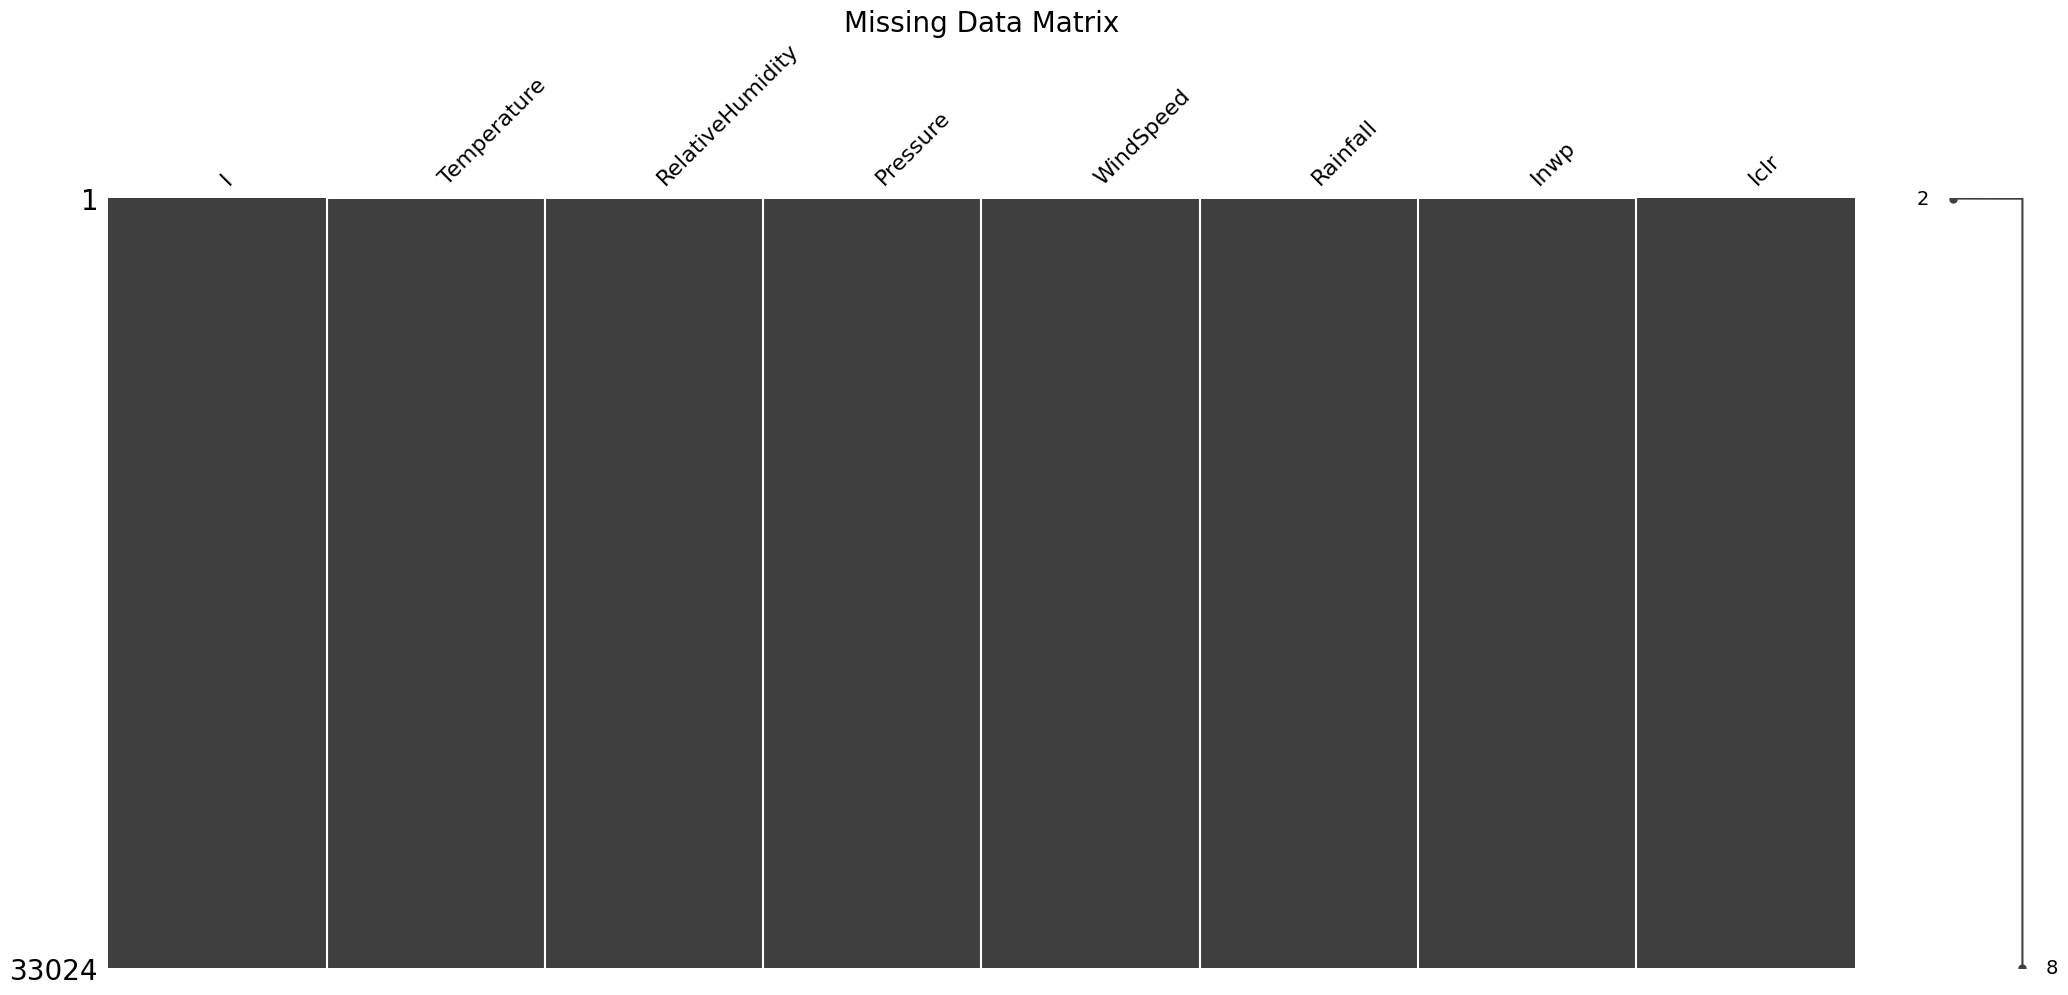

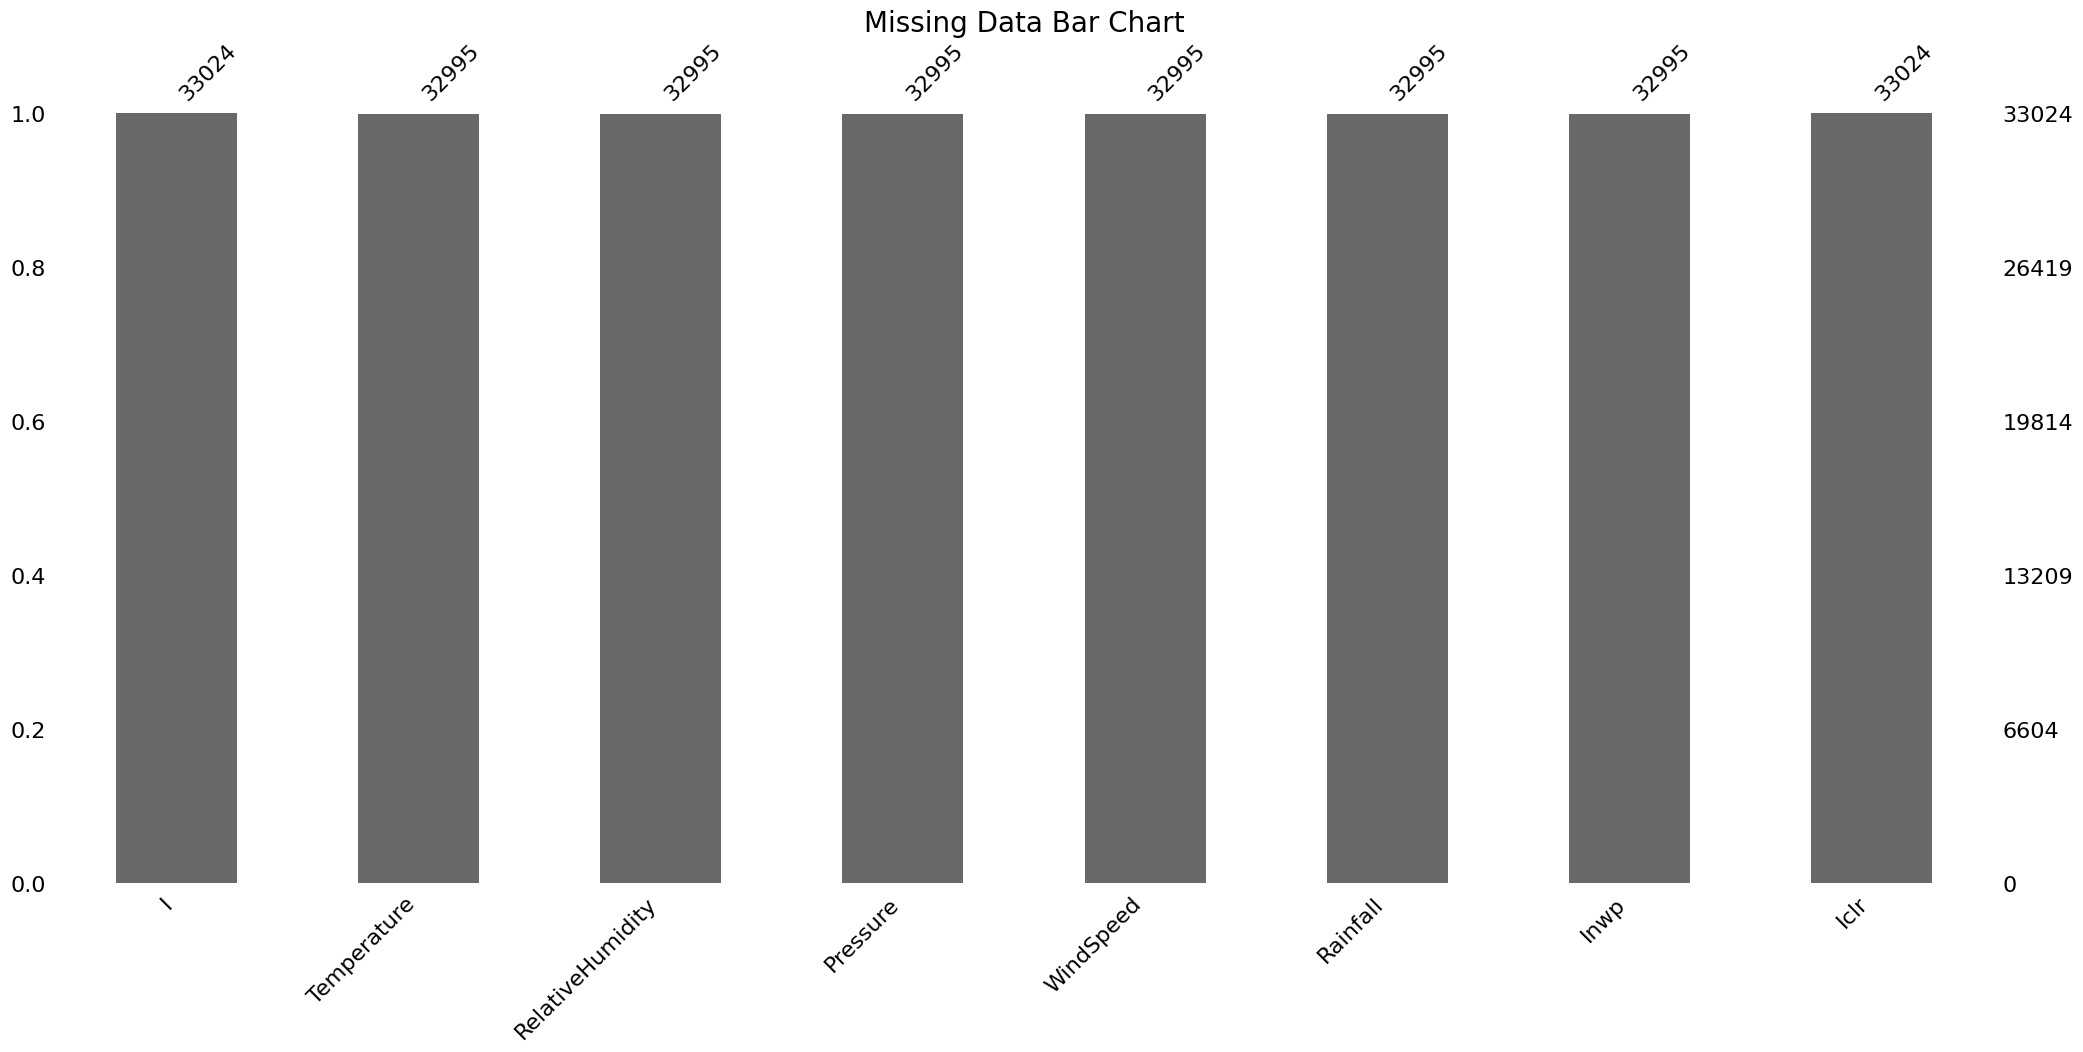

In [12]:
df_site1 = df[df['Site_id'] == 1].drop(columns = 'Site_id')

#----- Visualizing Missing Values in DataFrame -----
# Visualize missing data matrix
msno.matrix(df_site1)
plt.title("Missing Data Matrix", fontsize = 20)
plt.show()

''' 
The rightmost line is a sparkline that summarizes the completeness of data in each rows. 
- number '0' means 'there are 0 column that have no missing values in all rows'
- number '10' means 'there are at most 10 columns that have no missing values in the same row'
'''

# Visualize missing data bar chart
msno.bar(df_site1)
plt.title("Missing Data Bar Chart", fontsize = 20)
plt.show()

There are 2 types of missing data (gap):
1. Small gaps: less than 12 hours, we will use 'Linear Interpolation' to fill in the missing values in each column.
2. Large gaps: more than or equal 12 hours, we will leave them as NaN values.

In [13]:
# Create a full date range
starting_date = min(df_site1.index)
ending_date = max(df_site1.index)
resolution = df_site1.index[1] - df_site1.index[0]

full_date_range = pd.date_range(start=starting_date, end=ending_date, freq=resolution)

# Make index of df_site1 have consistent resolution (where the missing data are filled with NaN to be imputed later)
df_site1 = df_site1.reindex(full_date_range)

# Add Hour index into  the dataframe
df_site1['Hour'] = np.sin(df_site1.index.hour / 24  * np.pi)

# df_site1 = df_site1.drop(columns=['CI_CM_interpolated', 'CI_RGB_interpolated', 'rawI'])

# Drop nan rows
df_site1 = df_site1['2023-01-01 07:15:00':]

# Physically, irradiance should not exceed $1200 \text{ W/m}^2$ 
# since it is the solar irradiance that is measured from atmosphere. 
# We can see that there are some values that exceed this limit.
# We will set (or so called 'clip') these values to $1200 \text{ W/m}^2$.

df_site1.loc[:, 'I'] = df_site1['I'].clip(upper=1200)
df_site1.loc[:, 'Inwp'] = df_site1['Inwp'].clip(upper=1200)
df_site1.loc[:, 'Iclr'] = df_site1['Iclr'].clip(upper=1200)

# df_site1['CI_RGB_interpolated'] = df_site1['CI_RGB_interpolated']  / 255
# in the column 'Temperature', the outlier occurs in 2023-01-30 between 04:00 and 10:00.

df_site1.loc['2023-01-30 04:00': '2023-01-30 10:00', 'Temperature'] = np.nan

#  Create a NaN mask
cols = ['I', 'Temperature', 'RelativeHumidity', 'Pressure', 'WindSpeed', 'Rainfall', 'Inwp', 'Iclr']

for col in cols:
    nan_mask = df_site1[col].isna()
    
    # Identify consecutive NaN groups
    group_id = (nan_mask != nan_mask.shift()).cumsum(axis=0)  # Unique ID for each block per column

    # Prepare empty DataFrame to store group sizes per column
    group_sizes = nan_mask.groupby(group_id).transform('sum')

    # Build interpolation mask: interpolate only gaps 
    interpolation_mask = nan_mask & (group_sizes < 48)  # 48 time steps = 48 * 15 minutes = 12 hours

    # Temporarily mask large gaps
    temp_df = df_site1[col].copy()

    # Perform linear time-based interpolation for all columns
    interpolated_df = temp_df.interpolate(method='time', axis=0).where(interpolation_mask)

    # Assign interpolated results back to the original dataframe
    df_site1[col] = df_site1[col].fillna(interpolated_df)

rows_with_nans = df_site1.isna().any(axis=1)
df_site1.loc[rows_with_nans] = np.nan

df_site1

I  Temperature  RelativeHumidity  Pressure  \
2023-01-01 07:15:00   73.329167       294.21             60.44   1015.55   
2023-01-01 07:30:00  121.397833       294.58             59.34   1015.67   
2023-01-01 07:45:00  180.090333       294.94             58.24   1015.80   
2023-01-01 08:00:00  219.603167       295.30             57.14   1015.93   
2023-01-01 08:15:00  281.884500       295.67             56.04   1016.06   
...                         ...          ...               ...       ...   
2023-12-31 22:45:00    0.000000       301.79             49.05   1011.08   
2023-12-31 23:00:00    0.000000       301.68             49.35   1011.07   
2023-12-31 23:15:00    0.000000       301.56             49.66   1011.04   
2023-12-31 23:30:00    0.000000       301.44             49.96   1011.03   
2023-12-31 23:45:00    0.000000       301.32             50.27   1011.01   

                     WindSpeed  Rainfall      Inwp        Iclr      Hour  
2023-01-01 07:15:00       1.32       0.0   49.2072   29.613384  0.793353  
2023-01-01 07:30:00       1.42       0.0   89.4216   70.667648  0.793353  
2023-01-01 07:45:00       1.52       0.0  135.4960  119.863447  0.793353  
2023-01-01 08:00:00       1.63       0.0  187.0808  172.749977  0.866025  
2023-01-01 08:15:00       1.74       0.0  243.7740  226.928713  0.866025  
...                        ...       ...       ...         ...       ...  
2023-12-31 22:45:00       2.31       0.0    0.0000    0.000000  0.258819  
2023-12-31 23:00:00       2.32       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:15:00       2.32       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:30:00       2.33       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:45:00       2.34       0.0    0.0000    0.000000  0.130526  

[35011 rows x 9 columns]

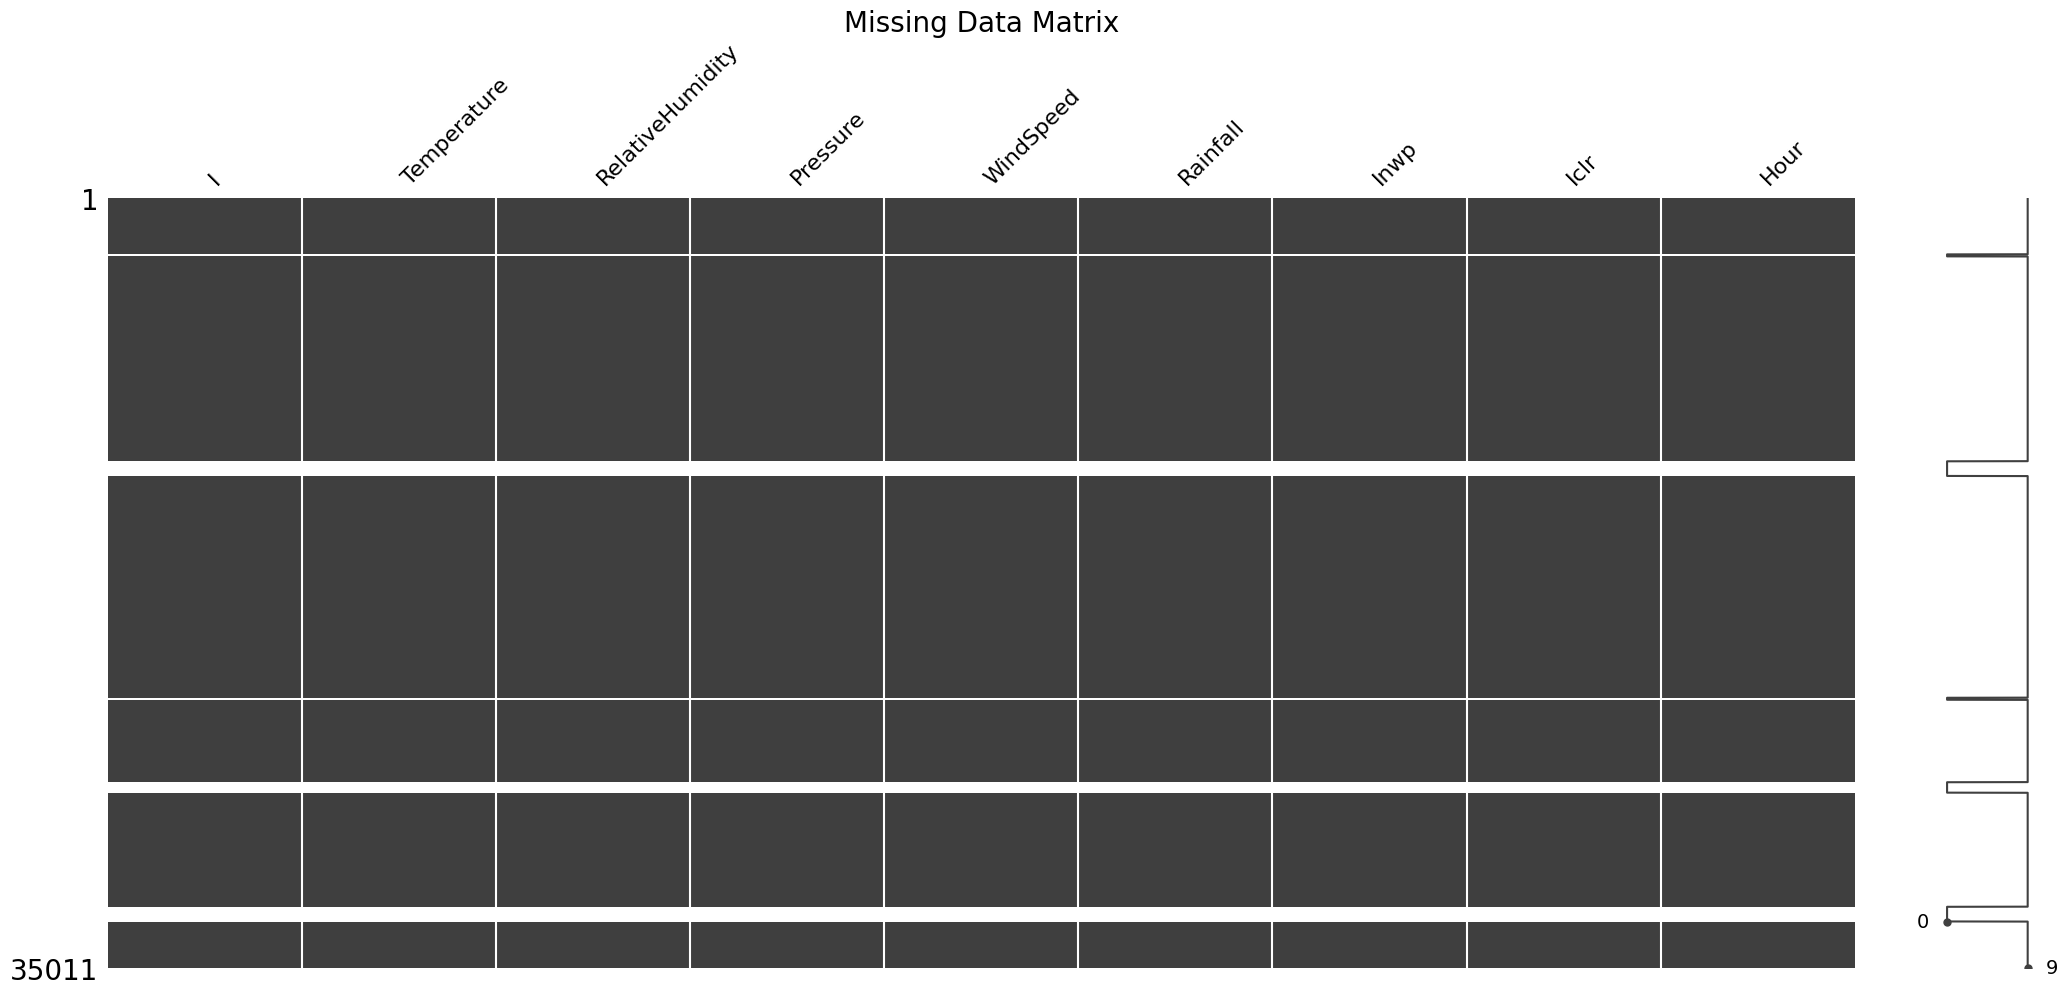

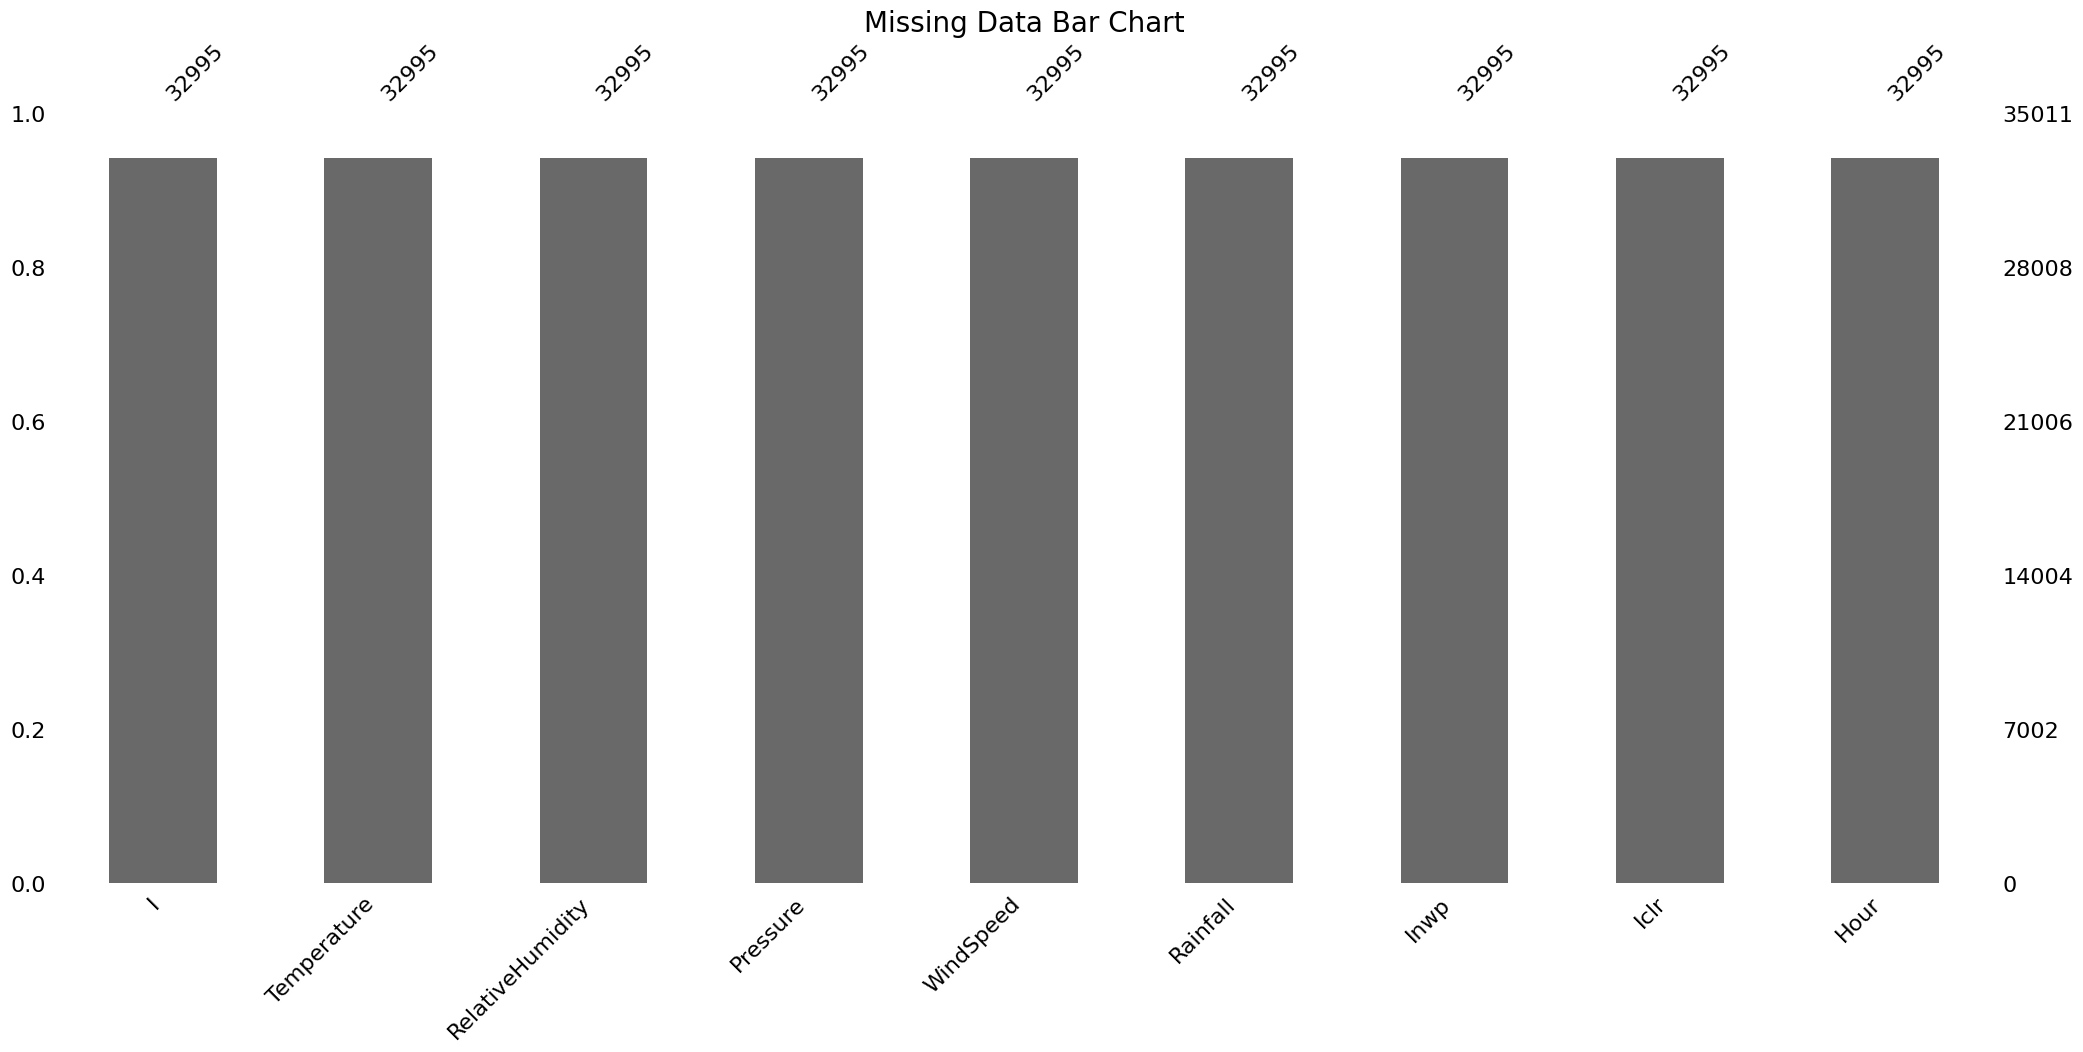

In [ ]:
#----- Visualizing Missing Values in DataFrame -----

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data matrix
msno.matrix(df_site1)
plt.title("Missing Data Matrix", fontsize = 20)
plt.show()

''' 
The rightmost line is a sparkline that summarizes the completeness of data in each rows. 
- number '0' means 'there are 0 column that have no missing values in all rows'
- number '10' means 'there are at most 10 columns that have no missing values in the same row'
'''

# Visualize missing data bar chart
msno.bar(df_site1)
plt.title("Missing Data Bar Chart", fontsize = 20)
plt.show()

In [14]:
# Visualize the dataset (at site 1)

columns = ['I', 'Inwp', 'Iclr']
columns_name_text = ['I', 'I_nwp', 'I_clr']

# Visualize the result
fig = go.Figure()

# Add the 'Actual' trace

for i in range(len(columns)):
    fig.add_trace(go.Scatter(x=df_site1.index, y=df_site1[columns[i]],
                         mode='lines',
                         name=columns_name_text[i],
                         line=dict(width=1)))

# Update layout for title, axis labels, and grid
fig.update_layout(
    title='Time Series Plot',
    xaxis_title='DateTime',
    yaxis_title='Irradiance',
    hovermode='x unified', # This is useful for time series to see values across traces at a given x
    template='plotly_white' # A clean white background template
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

### EDA: Exploratory Data Analysis

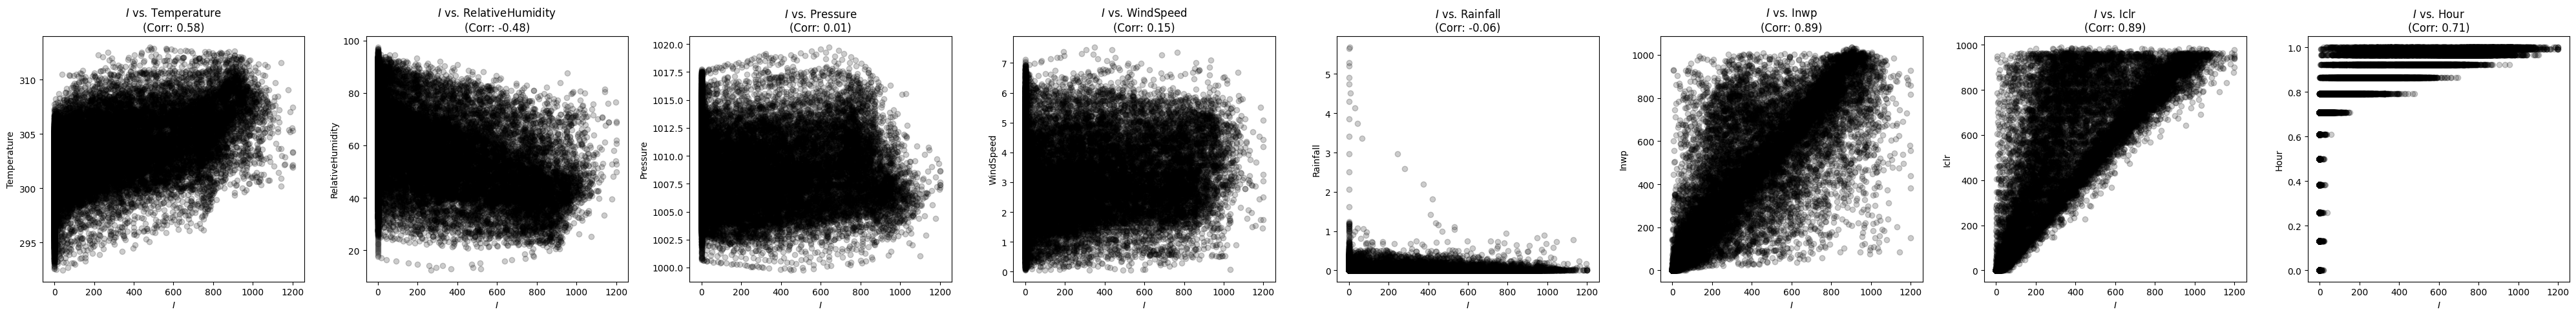

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_site1.corr(method='pearson')

# Get the columns to plot against 'I', excluding 'I' itself
columns_to_plot = df_site1.drop(columns=['I']).columns

# Create subplots dynamically
# The number of subplots is equal to the number of columns to plot against 'I'
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 5))

# If there's only one column to plot, ax will not be an array, so handle that case
if len(columns_to_plot) == 1:
    ax = [ax] # Make it a list so the loop works consistently

for i, col in enumerate(columns_to_plot):
    # Calculate the Pearson correlation coefficient between 'I' and the current column
    # We use .loc to ensure we get the specific correlation value
    correlation = correlation_matrix.loc['I', col]

    # Create the scatter plot
    ax[i].scatter(df_site1['I'], df_site1[col], c='black', alpha=0.2)
    
    # Set labels
    ax[i].set_xlabel('$I$')
    ax[i].set_ylabel(f'{col}')
    
    # Set title including the correlation value
    # Using f-string for easy formatting, rounding correlation to 2 decimal places
    ax[i].set_title(f'$I$ vs. {col}\n(Corr: {correlation:.2f})')

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()

### Make an input and output data

In [ ]:
df_site1

I  Temperature  RelativeHumidity  Pressure  \
2023-01-01 07:15:00   73.329167       294.21             60.44   1015.55   
2023-01-01 07:30:00  121.397833       294.58             59.34   1015.67   
2023-01-01 07:45:00  180.090333       294.94             58.24   1015.80   
2023-01-01 08:00:00  219.603167       295.30             57.14   1015.93   
2023-01-01 08:15:00  281.884500       295.67             56.04   1016.06   
...                         ...          ...               ...       ...   
2023-12-31 22:45:00    0.000000       301.79             49.05   1011.08   
2023-12-31 23:00:00    0.000000       301.68             49.35   1011.07   
2023-12-31 23:15:00    0.000000       301.56             49.66   1011.04   
2023-12-31 23:30:00    0.000000       301.44             49.96   1011.03   
2023-12-31 23:45:00    0.000000       301.32             50.27   1011.01   

                     WindSpeed  Rainfall      Inwp        Iclr      Hour  
2023-01-01 07:15:00       1.32       0.0   49.2072   29.613384  0.793353  
2023-01-01 07:30:00       1.42       0.0   89.4216   70.667648  0.793353  
2023-01-01 07:45:00       1.52       0.0  135.4960  119.863447  0.793353  
2023-01-01 08:00:00       1.63       0.0  187.0808  172.749977  0.866025  
2023-01-01 08:15:00       1.74       0.0  243.7740  226.928713  0.866025  
...                        ...       ...       ...         ...       ...  
2023-12-31 22:45:00       2.31       0.0    0.0000    0.000000  0.258819  
2023-12-31 23:00:00       2.32       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:15:00       2.32       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:30:00       2.33       0.0    0.0000    0.000000  0.130526  
2023-12-31 23:45:00       2.34       0.0    0.0000    0.000000  0.130526  

[35011 rows x 9 columns]

In [ ]:
# Make Input Sequences
lookback = pd.Timedelta('1d')
lookforward = pd.Timedelta('4d')
lookback_timestep = lookback // (df_site1.index[1] - df_site1.index[0])
lookforward_timestep = lookforward // (df_site1.index[1] - df_site1.index[0])
num_feature = df_site1.shape[1]

lag_regressor_cols = ['I']
target_cols=['I']
num_target = len(target_cols)

x_numpy, y_numpy, x_labels, y_labels, datetime = df_transform(df = df_site1, lag_regressor_cols=['I'], target_cols=target_cols, lookback_timedelta=lookback, lookforward_timedelta = lookforward)

x_scaled_numpy, y_scaled_numpy, x_scalers, y_scaler  = scale_transform(x_numpy, y_numpy)

x_scaled = torch.tensor(x_scaled_numpy, dtype=torch.float32).to(device)
y_scaled = torch.tensor(y_scaled_numpy, dtype=torch.float32).to(device)

# Train-Val-Test splitting
train_ratio = 0.8
val_ratio = 0.1

train_samples_count = int(x_scaled.shape[0] * train_ratio)
val_samples_count = int(x_scaled.shape[0] * val_ratio)

x_train_scaled, y_train_scaled, \
x_val_scaled, y_val_scaled, \
x_test_scaled, y_test_scaled, \
datetime_train, datetime_val, datetime_test = split_time_series_data(x = x_scaled, y = y_scaled, train_ratio = train_ratio, val_ratio = val_ratio, datetime=datetime)


# Make a dataloader for train dataset 
train_dataset = TensorDataset(x_train_scaled, y_train_scaled)
val_dataset = TensorDataset(x_val_scaled, y_val_scaled)
test_dataset = TensorDataset(x_test_scaled, y_test_scaled)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = False)
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

# The issue is from shuffling mechanics of torch making data in train_dataloader locates in cpu instead of gpu which we don't want to, so we apply generator manually.
# Create a generator for reproducibility and device consistency
# g = torch.Generator(device=device)
# g.manual_seed(0) # You can set a seed for reproducibility of shuffling
# train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle=True, generator = g)


--- Data Split Summary ---
Total samples: 30115
Train samples: 24092 (X shape: torch.Size([24092, 96, 9]), Y shape: torch.Size([24092, 384]))
Validation samples: 3011 (X shape: torch.Size([3011, 96, 9]), Y shape: torch.Size([3011, 384]))
Test samples: 3012 (X shape: torch.Size([3012, 96, 9]), Y shape: torch.Size([3012, 384]))
--------------------------


## Experiment

#### Initial

In [13]:
torch.manual_seed(21)
model_TransformerEncoder_1 = TransformerEncoderModel(
    d_model=64,
    nhead=8,
    num_layers=6,
    dim_feedforward=1024,
    input_size=num_feature,
    output_size=lookforward_timestep,                # make a prediction with the number of timestep equal to lookforward timestep
    seq_len=lookback_timestep,
    dropout=0.1,
)
model_TransformerEncoder_1.to(device)

optimizer = Adam(model_TransformerEncoder_1.parameters(), lr=1e-4)
criterion = nn.L1Loss()

#### Adding an Early stopping and Scheduler into the training process #####
early_stop_count = 0
patience = 20
min_loss = float('inf')

# scheduler = ExponentialLR(optimizer, gamma=0.99)        # To adjust learning rates

print("\n--- Model ---")
print("Model architecture:")
print(model_TransformerEncoder_1)
print(f"Total parameters: {sum(p.numel() for p in model_TransformerEncoder_1.parameters() if p.requires_grad)}")



--- Model ---
Model architecture:
TransformerEncoderModel(
  (input_embedding): Linear(in_features=9, out_features=64, bias=True)
  (position_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=1024, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=1024, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (regression_head): Sequential(
    (0): Linear(in_features=256,

In [ ]:
##### Train the Model #####

# Clear CUDA cache before starting hyperparameter search
if torch.cuda.is_available():
    torch.cuda.empty_cache()

model_TransformerEncoder_1, *loss_history_model_TransformerEncoder = trainer(
    model_TransformerEncoder_1, 
    train_dataloader=train_dataloader, 
    val_dataloader=val_dataloader,
    optimizer=optimizer, 
    criterion=criterion, 
    scheduler=None, 
    max_epochs=200, 
    early_stopping_patience=20,
    )

In [ ]:
##### Make a Prediction to the whole Dataset #####

y_pred, y_test, eval_loss = predictor(
    model=model_TransformerEncoder_1, 
    test_dataloader=test_dataloader,
    y_scaler=y_scaler,
    criterion=nn.L1Loss(), 
    )

print(f'Evaluation Loss: {eval_loss}')

plotly_visualization_line(x=datetime_test, y=[y_test[:, 0], y_pred[:, 0]], name=['Actual', 'Predicted'])

In [ ]:
##### Make a Prediction to the whole Dataset #####

y_train_pred, y_train, eval_loss = predictor(
    model=model_TransformerEncoder_1, 
    test_dataloader=train_dataloader,
    y_scaler=y_scaler,
    criterion=nn.L1Loss(), 
    )

print(f'Evaluation Loss: {eval_loss}')

plotly_visualization_line(x=datetime_train, y=[y_train[:, 0], y_train_pred[:, 0]], name=['Actual', 'Predicted'])

#### Grid Search (Encoder) with Optuna

In [23]:
def objective_grid(trial, model_parameters, train_dataloader, val_dataloader, device=cuda_check()):
    if torch.cuda.is_available():
        gc.collect()
        torch.cuda.empty_cache()

    try:
        d_model_per_head = trial.suggest_categorical('d_model_per_head', [4, 8, 16, 32, 64])
        nhead = trial.suggest_categorical('nhead', [1, 2, 4, 8])
        num_layers = trial.suggest_categorical('num_layers', [1, 2, 3, 4])
        dim_feedforward = trial.suggest_categorical('dim_feedforward', [128, 256, 512, 1024])

        model = TransformerEncoderModel(
            input_size=model_parameters['num_feature'],
            output_size=model_parameters['lookforward_timestep'],
            seq_len=model_parameters['lookback_timestep'],
            d_model=d_model_per_head * nhead,
            nhead=nhead,
            num_layers=num_layers,
            dim_feedforward=dim_feedforward,
            dropout=0.1
        ).to(device)
        optimizer = Adam(model.parameters(), lr=0.001)
        criterion = nn.L1Loss()
        # scheduler = ExponentialLR(optimizer, gamma=0.99)

        _, _, val_loss = trainer(
            model=model,
            optimizer=optimizer,
            criterion=criterion,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            scheduler=None,
            max_epochs=200,
            early_stopping_patience=20,
            display_result=False
        )

        return val_loss[-1] if val_loss else float('inf')

    except Exception as e:
        print(f"Trial failed: {e}")
        return float('inf')

In [ ]:
# Grid Search

model_parameters = {
    'num_feature': num_feature, 
    'lookforward_timestep': num_target, 
    'lookback_timestep': lookback_timestep
}

# Grid search space
search_space = {
    'd_model_per_head' : [4, 8, 16, 32, 64],
    'nhead': [1, 2, 4, 8],
    'num_layers': [1, 2, 3, 4],
    'dim_feedforward': [128, 256 512, 1024],
}

n_trials = num_combination_grid(search_space)
print(f"Grid Search: Total combinations = {n_trials}")

# Define the objective function wrapper
objective = lambda trial: objective_grid(
    trial, 
    model_parameters, 
    train_dataloader, 
    val_dataloader
)

# Run optimization
study = run_optimization(
    objective=objective,
    n_trials=n_trials,
    timeout=None,
    sampler=optuna.samplers.GridSampler(search_space, seed=42),
    pruner = optuna.pruners.MedianPruner(
        n_startup_trials=5,     # First 5 trials will run fully without begin pruned
        n_warmup_steps=3,       # No pruning in the first 3 steps of any trial
        interval_steps=1,       # Pruning check every 2 epochs
        n_min_trials=5          # Need at least 3 completed trials before pruning starts
        ),
    n_jobs=5
)

final_model_grid, r2_grid, mse_grid, mae_grid = train_final_model(
    study, 
    model_parameters, 
    train_dataloader=train_dataloader, 
    val_dataloader=val_dataloader, 
    test_dataloader=test_dataloader
)

best_n_models_grid = show_n_best_models(study, n=5)

print("\nStudy Summary:")
print(f"Total Trials: {len(study.trials)}")
print(f"Pruned Trials: {sum(t.state == optuna.trial.TrialState.PRUNED for t in study.trials)}")
print(f"Completed Trials: {sum(t.state == optuna.trial.TrialState.COMPLETE for t in study.trials)}")

[I 2025-07-21 18:19:40,195] A new study created in memory with name: no-name-3184464b-3493-4307-8cef-e816d7d3c741


Grid Search: Total combinations = 96


  0%|          | 0/96 [00:00<?, ?it/s]

In [ ]:
##### Make a Prediction to the whole Dataset #####

y_pred, y_test, eval_loss = predictor(
    model=final_model_grid, 
    test_dataloader=test_dataloader,
    y_scaler=y_scaler,
    criterion=nn.L1Loss(), 
    )

print(f'Evaluation Loss: {eval_loss}')

plotly_visualization_line(x=datetime_test, y=[y_test[:, 0], y_pred[:, 0]], name=['Actual', 'Predicted'])

Evaluation Loss: 0.14525591194307289
